In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
yelp= pd.read_csv('yelp.csv')


In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


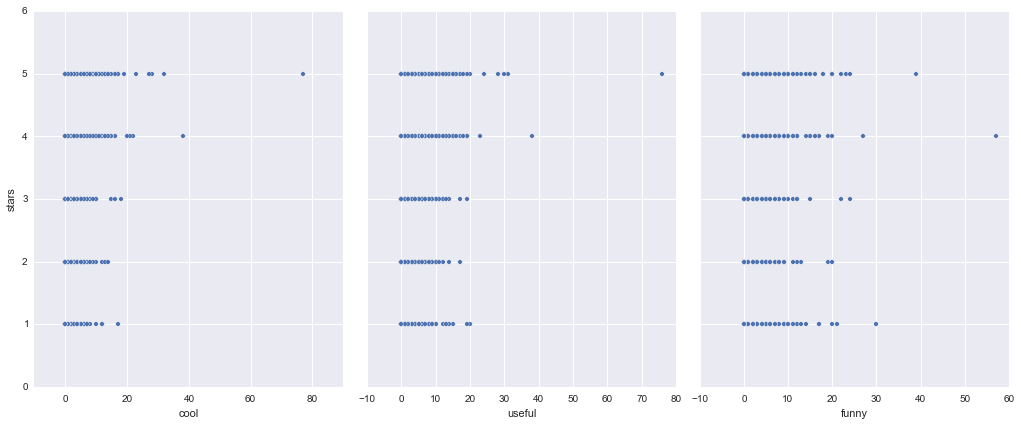

In [15]:
sns.pairplot(yelp, x_vars=['cool','useful','funny'], y_vars='stars', size=6, aspect=0.8)


In [6]:
#Define Features and Resoponse 
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
y = yelp.stars

In [7]:
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

3.83989479278
[ 0.27435947 -0.14745239 -0.13567449]


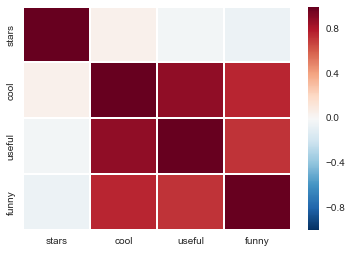

In [10]:
#map a correlation between the features and the response using heat map to understand the negative coefficients for...
#"useful and funny" versus number of stars. It turns out that there is less correlation between the features and the
#response than the among the features them selves, which explains the negative coefficients. 

sns.heatmap(yelp.corr())


In [8]:
def train_test_rmse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [9]:
feature_cols = ['cool', 'useful', 'funny']
X = yelp[feature_cols]
train_test_rmse(X, y)

1.1842905282165899

In [12]:
# take out 'cool' feature to see the difference
feature_cols = ['useful', 'funny']
X = yelp[feature_cols]
train_test_rmse(X, y)

1.2098272023900722

In [13]:
# calculate RMSE just with feature 'cool'
feature_cols = ['cool']
X = yelp[feature_cols]
train_test_rmse(X, y)

1.2105519534116305

In [ ]:
#The RMSE did not show a significant change when excluding and including features. This might be explained by the
#little or no correlation between the features and the number of stars users gave to a buisness. 